Let's infer the HMDB-51 data using the I3D network.  

First, we want to download the pre-trained weights from the [MODEL_ZOO.md](https://github.com/kiyoon/PyVideoAI/blob/master/MODEL_ZOO.md)  
We'll use the I3D pretrained on the HMDB-51 dataset, with 8-frame input.  

Note that the path to the pretrained weights is defined in `model_configs/i3d_resnet50.py` as below.  

```python
hmdb_pretrained_path_8x8 = os.path.join(DATA_DIR, 'pretrained', 'hmdb/i3d_resnet50/crop224_lr0001_batch8_8x8_largejit_plateau_1scrop5tcrop_split1-epoch_0199.pth')
```

In [74]:
# Environments for future use

from pyvideoai.config import PYVIDEOAI_DIR, DATA_DIR
%env PYVIDEOAI_DIR=$PYVIDEOAI_DIR
%env DATA_DIR=$DATA_DIR

# !! CHANGE BELOW
%env HDD_PATH=/storage/kiyoon

env: PYVIDEOAI_DIR=/home/kiyoon/project/PyVideoAI
env: DATA_DIR=/home/kiyoon/project/PyVideoAI/data
env: HDD_PATH=/storage/kiyoon


In [5]:
# Link the pretrained weight directory to HDD
!mkdir -p "$HDD_PATH/pretrained/hmdb/i3d_resnet50"
!ln -s "$HDD_PATH/pretrained" "$DATA_DIR/"

# Download
!wget 'https://uoe-my.sharepoint.com/:u:/g/personal/s1884147_ed_ac_uk/EefmKjHu_iRPvN2JTqG2QNYBoCs18kbX0ajidiKOuWEgZQ?e=9oGJ0v&download=1' -O "$DATA_DIR/pretrained/hmdb/i3d_resnet50/crop224_lr0001_batch8_8x8_largejit_plateau_1scrop5tcrop_split1-epoch_0199.pth"

--2021-06-21 02:14:54--  https://uoe-my.sharepoint.com/:u:/g/personal/s1884147_ed_ac_uk/EefmKjHu_iRPvN2JTqG2QNYBoCs18kbX0ajidiKOuWEgZQ?e=9oGJ0v&download=1
Resolving uoe-my.sharepoint.com (uoe-my.sharepoint.com)... 13.107.136.9
Connecting to uoe-my.sharepoint.com (uoe-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/s1884147_ed_ac_uk/Documents/share/UniversityOfEdinburgh/PyVideoAI/model_zoo/hmdb/i3d_resnet50/hmdb-i3d_resnet50-crop224_lr0001_batch8_8x8_largejit_plateau_1scrop5tcrop_split1-epoch_0199.pth?originalPath=aHR0cHM6Ly91b2UtbXkuc2hhcmVwb2ludC5jb20vOnU6L2cvcGVyc29uYWwvczE4ODQxNDdfZWRfYWNfdWsvRWVmbUtqSHVfaVJQdk4ySlRxRzJRTllCb0NzMThrYlgwYWppZGlLT3VXRWdaUT9ydGltZT16Y3VFNDNzMDJVZw [following]
--2021-06-21 02:14:55--  https://uoe-my.sharepoint.com/personal/s1884147_ed_ac_uk/Documents/share/UniversityOfEdinburgh/PyVideoAI/model_zoo/hmdb/i3d_resnet50/hmdb-i3d_resnet50-crop224_lr0001_batch8_8x8_largejit_plateau_1scrop

Now we have our datasets processed, and the pretrained weights ready.  
We want to use three config files.  
- `hmdb.py` in `dataset_configs`,  
- `i3d_resnet50.py` in `model_configs`,  
- `hmdb/i3d_resnet50-crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained.py` in `exp_configs`.

You'll need at least 6GiB of VRAM on your GPU.  
If this isn't the case or you have more, change the batch size in `exp_configs/hmdb/i3d_resnet50-crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained.py`.

In [14]:
# If you have more than 1 GPUs, go ahead and change CUDA_VISIBLE_DEVICES to the comma-separated GPU indices, and --local_world_size to the number of GPUs.
# This will increase the batch size (1 GPU=size 8, 2 GPU=size 16, ...) and speed up the learning.
# However, Jupyter Notebook doesn't seem to support stdout printing with multiple processes. Try using normal shell.

# -p will save the predictions into a pickle file.
# Adding `-m multicrop` will make it perform multicrop evaluation.
%env CUDA_VISIBLE_DEVICES=0
%run "$PYVIDEOAI_DIR/tools/run_val.py" --local_world_size 1 -D hmdb -M i3d_resnet50 -N crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained -p

experiment_utils.experiment_builder:  103 - INFO - Telegram bot initialised with keys in /home/kiyoon/project/PyVideoAI/tools/key.ini and using the bot number 0
pyvideoai.val_multiprocess:  112 - INFO - git hash: e6eb6a3b9b4332a766947d164f48f001c1e5399b
pyvideoai.val_multiprocess:  115 - INFO - args: {
    "local_world_size": 1,
    "shard_id": 0,
    "num_shards": 1,
    "init_method": "tcp://localhost:19999",
    "backend": "nccl",
    "experiment_root": "/storage/kiyoon/experiments",
    "dataset": "hmdb",
    "model": "i3d_resnet50",
    "experiment_name": "crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained",
    "dataset_channel": null,
    "model_channel": null,
    "experiment_channel": null,
    "load_epoch": null,
    "seed": 12,
    "mode": "oneclip",
    "save_predictions": true,
    "dataloader_num_workers": 4,
    "telegram_bot_idx": 0
}
pyvideoai.dataloaders.frames_densesample_dataset:   95 - INFO - Constructing video dataset test...
pyvideoai.dataloaders.frames_densesa

env: CUDA_VISIBLE_DEVICES=0


pyvideoai.utils.misc:   52 - INFO - Model:
ResNetModel(
  (s1): VideoModelStem(
    (pathway0_stem): ResNetBasicStem(
      (conv): Conv3d(3, 64, kernel_size=[5, 7, 7], stride=[1, 2, 2], padding=[2, 3, 3], bias=False)
      (bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
    )
  )
  (s2): ResStage(
    (pathway0_res0): ResBlock(
      (branch1): Conv3d(64, 256, kernel_size=(1, 1, 1), stride=[1, 1, 1], bias=False)
      (branch1_bn): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (branch2): BottleneckTransform(
        (a): Conv3d(64, 64, kernel_size=[3, 1, 1], stride=[1, 1, 1], padding=[1, 0, 0], bias=False)
        (a_bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (a_relu): ReLU(inplace=True)
        (b): Conv3d(6

pyvideoai.train_and_val:  324 - INFO -  One-clip Eval Iter:  192/ 192 - Sample:   1530/  1530 - 16s - val_loss: 3.3207 - val_acc: 0.7033
pyvideoai.val_multiprocess:  223 - SUCCESS - Finished evaluation


Saving predictions to: /storage/kiyoon/experiments/hmdb/i3d_resnet50/crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained/predictions/pretrained_oneclipval.pkl


# What to do with the saved predictions
Many tools provided in the framework allows you to analyse performance using the saved predictions.  
We list some examples below.

## Loading the predictions (as raw data)
Sometimes you want to load the raw predictions and run your own code to analyse.  
Here's how to load the pickled predictions.

In [2]:
from pyvideoai.config import DEFAULT_EXPERIMENT_ROOT
from experiment_utils.experiment_builder import ExperimentBuilder
import os
import pickle

# ExperimentBuilder quickly navigates you to the correct directory path of the experiment
exp = ExperimentBuilder(DEFAULT_EXPERIMENT_ROOT, 'hmdb', 'i3d_resnet50', 'crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained')
predictions_path = os.path.join(exp.predictions_dir, 'pretrained_oneclipval.pkl')
print(f'Predictions file path: {predictions_path}')

with open(predictions_path, 'rb') as f:
    predictions = pickle.load(f)

# Predictions are saved as dictionary of numpy arrays
print(f"Shape of video_ids (NUM_VAL_SAMPLES,): {predictions['video_ids'].shape}")
print(f"Shape of video_labels (NUM_VAL_SAMPLES,): {predictions['video_labels'].shape}")
print(f"Shape of video_predictions (NUM_VAL_SAMPLES, NUM_CLASSES): {predictions['video_predictions'].shape}")

Predictions file path: /storage/kiyoon/experiments/hmdb/i3d_resnet50/crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained/predictions/pretrained_oneclipval.pkl
Shape of video_ids (NUM_VAL_SAMPLES,): (1530,)
Shape of video_labels (NUM_VAL_SAMPLES,): (1530,)
Shape of video_predictions (NUM_VAL_SAMPLES, NUM_CLASSES): (1530, 51)


## Evaluate accuracy again using the saved predictions

In [3]:
# No GPU required
%env CUDA_VISIBLE_DEVICES=
%run "$PYVIDEOAI_DIR/tools/evaluate_using_saved_pred.py" -D hmdb -M i3d_resnet50 -N crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained

env: CUDA_VISIBLE_DEVICES=
0.7032679738562092


## Per-class accuracy and confusion matrix

Running the code below will generate confusion matrices of various sorting methods and shrinking classes with few validation examples.  
It will save as CSV, image (PNG & PDF) formats, and to the TensorBoard.

In [71]:
%run "$PYVIDEOAI_DIR/tools/visualisations/generate_confusion_matrix.py" -D hmdb -M i3d_resnet50 -N crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained

[INFO: experiment_builder.py:  109]: Telegram bot not initialised.
[INFO: generate_confusion_matrix.py:  265]: train_class_frequency
[INFO: generate_confusion_matrix.py:  189]: Saving confusion matrix to /storage/kiyoon/experiments/hmdb/i3d_resnet50/crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained/plots/per_class_accuracy/sort_train_class_frequency
[INFO: generate_confusion_matrix.py:  194]: Saving confusion matrix to TensorBoard tagged sort_train_class_frequency
[INFO: generate_confusion_matrix.py:  265]: val_class_frequency
[INFO: generate_confusion_matrix.py:  189]: Saving confusion matrix to /storage/kiyoon/experiments/hmdb/i3d_resnet50/crop224_batch8_8x8_1scrop5tcrop_hmdbsplit1pretrained/plots/per_class_accuracy/sort_val_class_frequency
[INFO: generate_confusion_matrix.py:  194]: Saving confusion matrix to TensorBoard tagged sort_val_class_frequency
[INFO: generate_confusion_matrix.py:  265]: val_per_class_accuracy
[INFO: generate_confusion_matrix.py:  189]: Saving confusion m

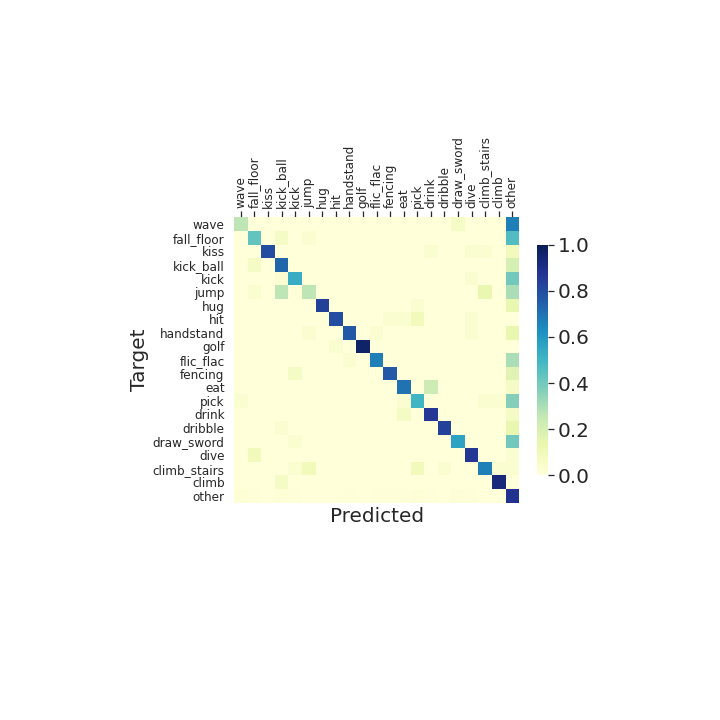

In [73]:
# Preview confusion matrix
png_path = os.path.join(exp.plots_dir, 'per_class_accuracy', 'sort_train_class_frequency', 'shrinked_confusion.png')
from IPython.display import Image
Image(filename=png_path)

In [69]:
# Preview per_class_accuracy.csv
csv_path = os.path.join(exp.plots_dir, 'per_class_accuracy', 'sort_train_class_frequency', 'shrinked_per_class_accuracy.csv')

!head -10 "$csv_path"

class_key,accuracy (%),num_correct_pred,num_samples_in_val,num_samples_in_train
wave,26.666666666666668,8,30,70
fall_floor,43.333333333333336,13,30,70
kiss,80.0,24,30,70
kick_ball,73.33333333333333,22,30,70
kick,53.333333333333336,16,30,70
jump,26.666666666666668,8,30,70
hug,83.33333333333334,25,30,70
hit,80.0,24,30,70
handstand,76.66666666666667,23,30,70
